# ESCUELA POLITECNICA NACIONAL
## FACULTAD DE SISTEMA
### Nombre: Jonathan Vargas
### Analisis de un dataset de juegos moviles

### 1. Introduccion
#### El porcentaje de dispositivos móviles sobre computadoras de escritorio está aumentando. Android posee aproximadamente el 53,2% del mercado de teléfonos inteligentes, mientras que iOS es el 43%. Para que más personas descarguen su aplicación, debe asegurarse de que puedan encontrarla fácilmente. El análisis de aplicaciones móviles es una excelente manera de comprender la estrategia existente para impulsar el crecimiento y la retención de futuros usuarios. Con millones de aplicaciones en la actualidad, el siguiente conjunto de datos se ha convertido en una clave para obtener las mejores aplicaciones de tendencias en la tienda de aplicaciones iOS. Este conjunto de datos contiene más de 7000 detalles de la aplicación móvil Apple iOS. Los datos se extrajeron de la API de búsqueda de iTunes en el sitio web de Apple Inc.

### 2. Desarrollo
#### Se utilizo un dataset con la informacion de las aplicaciones existentes en la App Store. Este dataset fue descargado de la comunidad online Kaggle. 

### Importar las librerias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np

In [2]:
#lectura del dataset
path ='C:\\Users\\jonat\\Documents\\GitHub\\py-vargas-nilve-jonathan-santiago\\Proyecto\\AppleStore.csv'
df1 = pd.read_csv(path)

### Los atributos del dataset son:

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


### "id" : ID de la aplicacion
### "track_name": Nombre de la aplicacion
### "size_bytes": Tamaño en Bytes de la aplicacion
### "currency": Tipo de moneda
### "price": precio de la aplicacion
### "rating_count_tot": calificacion de los usuarios (todas las versiones)
### "rating_count_ver": calificacion de los usuarios (para la version actual)
### "user_rating" : promedio de la calificacion de los usuarios (todas las versiones)
### "user_rating_ver": Valor promedio de calificación del usuario (para la version actual)
### "ver" : Código de la última versión
### "cont_rating": Calificación de contenido
### "prime_genre": Genero
### "sup_devices.num": Numero de dispositivos compatibles
### "ipadSc_urls.num": Número de capturas de pantalla para mostrar
### "lang.num": Cantidad de idiomas soportados
### "vpp_lic": Licencias basadas en dispositivos Vpp habilitadas

### Se selecciona con que columnas se trabajara y se lee el dataset

In [4]:
columnas = ['id', 'track_name','size_bytes','price', 'prime_genre','sup_devices.num','lang.num']
df2 = pd.read_csv(path, usecols = columnas, index_col = 'id')

path_guardado =  'C:\\Users\\jonat\\Documents\\GitHub\\py-vargas-nilve-jonathan-santiago\\Proyecto\\appStore-guradado.csv'
df2.to_pickle(path_guardado)

df3 = pd.read_pickle(path_guardado)


### Mediante este grafico se visualiza el numero de dispositivos compatibles en cada genero

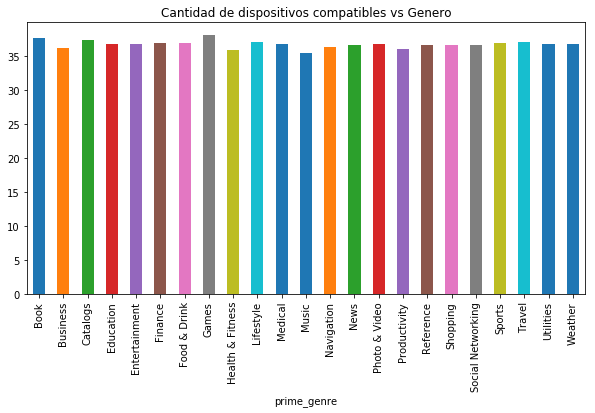

In [5]:
plt.figure(figsize=(10,5))
plt.title("Cantidad de dispositivos compatibles vs Genero")
df3.groupby('prime_genre').mean()["sup_devices.num"].plot(kind='bar')


### cuales son las 10 aplicaciones mas costosas.

In [6]:
app_mas_caras = df3.sort_values(by = ['price'],ascending=False)
app_mas_caras = app_mas_caras.loc[:,['track_name','price','prime_genre']]
app_mas_caras.head(10)

,track_name,price,prime_genre
id,,,
551215116,LAMP Words For Life,299.99,Education
308368164,Proloquo2Go - Symbol-based AAC,249.99,Education
849732663,KNFB Reader,99.99,Productivity
320279293,NAVIGON Europe,74.99,Navigation
946930094,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business
491998279,Articulation Station Pro,59.99,Education
700440156,Articulation Test Center Pro,59.99,Education
1080310524,VPN Pro | Lifetime Proxy & Best VPN by Betternet,49.99,Business
583976519,Cubasis 2 - Mobile Music Creation System,49.99,Music


### Las 10 aplicaciones mas baratas

In [7]:
app_mas_baratas = df3.sort_values(by = ['price'],ascending=True)
app_mas_baratas = app_mas_baratas.loc[:,['track_name','price','prime_genre']]
app_mas_baratas.head(10)

,track_name,price,prime_genre
id,,,
1188375727,Escape the Sweet Shop Series,0.0,Games
968666409,Robocide,0.0,Games
968433730,Adobe Spark Page — Create Stunning Web Pages,0.0,Productivity
968213298,Bike Race Level 100,0.0,Games
968016877,Winterstate,0.0,Games
967912296,激ムズ！和のひとふで書き！ 〜頭をつかう脳トレパズルゲーム〜,0.0,Games
967870967,Cyber Reversi,0.0,Games
968744559,Sonic Dash 2: Sonic Boom,0.0,Games
1109751921,Really Bad Chess,0.0,Games


### Muestre la cantidad de aplicaciones por cada genero

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64


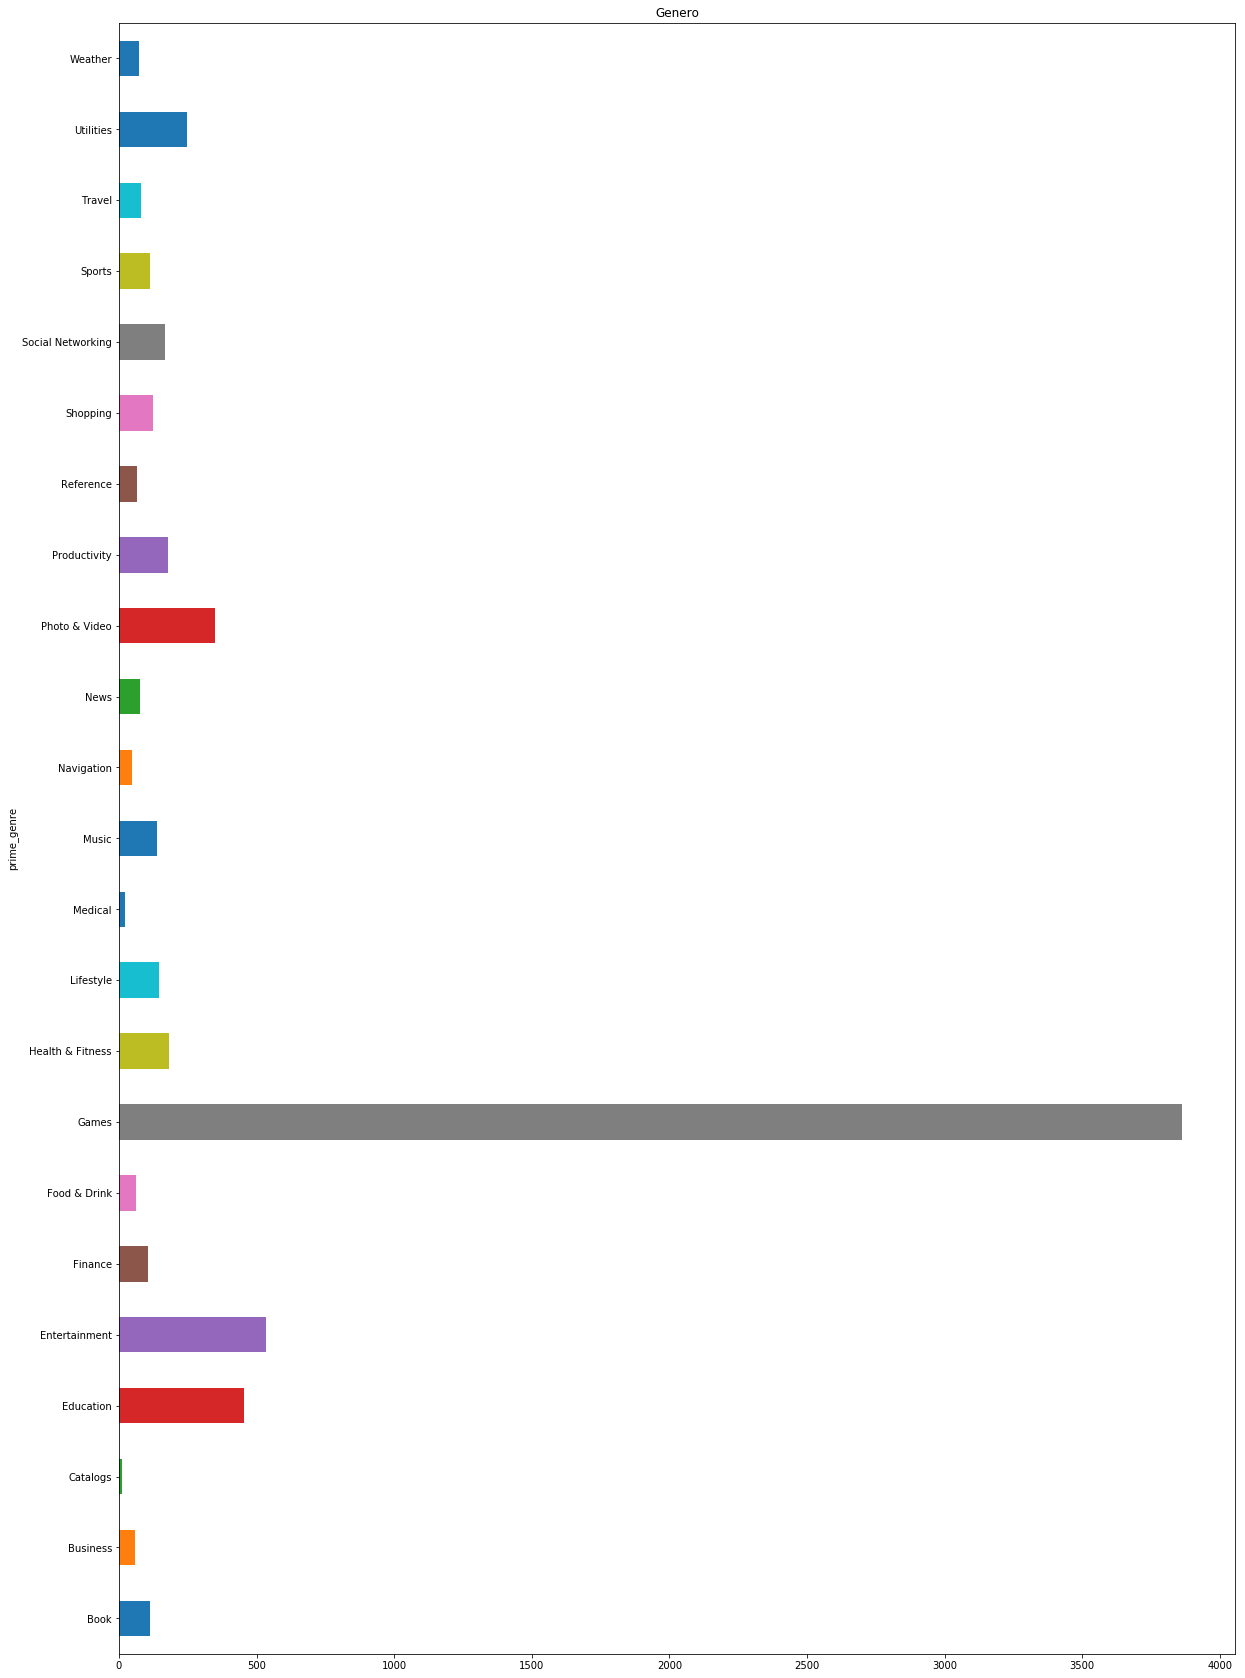

In [8]:
num_app_por_genero = df3['prime_genre'].value_counts()
print(num_app_por_genero)
plt.figure(figsize=(20,30))
plt.title("Genero")
df3.groupby(['prime_genre'])['prime_genre'].count().plot(kind="barh")

In [9]:
#transformar bytes a Megabytes
def bytes_a_megaBytes(valor):
    return valor*1e-6

df3['size_bytes'] = df3['size_bytes'].map(bytes_a_megaBytes)

### Cuales son las 10 aplicaciones con mas peso en MB

In [10]:
app_con_mas_tam = df3.sort_values(by = ['size_bytes'],ascending=False)
app_con_mas_tam = app_con_mas_tam.loc[:,['track_name','size_bytes','prime_genre']]
app_con_mas_tam.columns = ['NOMBRE','TAMANO EN MB','GENERO']
app_con_mas_tam.head(10)

,NOMBRE,TAMANO EN MB,GENERO
id,,,
1106831630,ROME: Total War,4025.969664,Games
1146713881,パチスロ ガールズ＆パンツァー,3975.609344,Games
1141253112,戦国乙女2～深淵に輝く気高き将星～,3968.637952,Games
1055962232,デビルサバイバー２ 最後の７日間,3956.326400,Games
1108475553,Jade Empire™: Special Edition,3896.109056,Games
1041260001,FINAL FANTASY Ⅸ,3860.406272,Games
1091640857,"That Dragon, Cancer",3856.588800,Games
687888390,République,3646.993408,Games
978524071,Grim Fandango Remastered,3521.220608,Games


###  Rango de precio que tienen las aplicaciones. Podemos observar que hay 7184 app que estan entre 0 y 30 dolares 

In [11]:
df3['price'].value_counts ( bins = 10 )

(-0.301, 29.999]      7184
(29.999, 59.998]         9
(269.991, 299.99]        1
(239.992, 269.991]       1
(89.997, 119.996]        1
(59.998, 89.997]         1
(209.993, 239.992]       0
(179.994, 209.993]       0
(149.995, 179.994]       0
(119.996, 149.995]       0
Name: price, dtype: int64

In [12]:
columnas = ['id', 'track_name','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','cont_rating','prime_genre']
df4 = pd.read_csv(path, usecols = columnas, index_col = 'id')

path_guardado_calif =  'C:\\Users\\jonat\\Documents\\GitHub\\py-vargas-nilve-jonathan-santiago\\Proyecto\\appStore-calif.csv'
df4.to_pickle(path_guardado_calif)
df5 = pd.read_pickle(path_guardado_calif)
df5.head(10)

,track_name,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
id,,,,,,,
281656475,PAC-MAN Premium,21292,26,4.0,4.5,4+,Games
281796108,Evernote - stay organized,161065,26,4.0,3.5,4+,Productivity
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",188583,2822,3.5,4.5,4+,Weather
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",262241,649,4.0,4.5,12+,Shopping
282935706,Bible,985920,5320,4.5,5.0,4+,Reference
283619399,Shanghai Mahjong,8253,5516,4.0,4.0,4+,Games
283646709,PayPal - Send and request money safely,119487,879,4.0,4.5,4+,Finance
284035177,Pandora - Music & Radio,1126879,3594,4.0,4.5,12+,Music
284666222,PCalc - The Best Calculator,1117,4,4.5,5.0,4+,Utilities


### Cuantas aplicaciones recibieron una buenas calificaciones por parte de los usuarios

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64


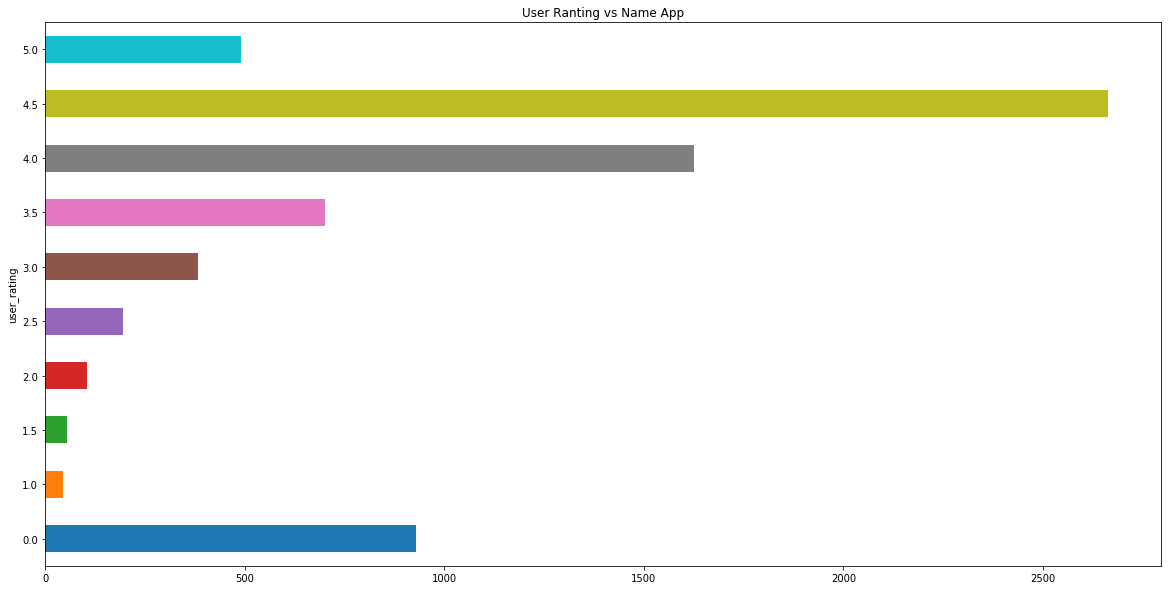

In [13]:
calif_app = df5['user_rating'].value_counts()
print(calif_app)
plt.figure(figsize=(20,10))
plt.title("User Ranting vs Name App")
df5.groupby(['user_rating'])['track_name'].count().plot(kind="barh")


### Cuales son las 10 aplicaciones con la mejor calificacion

In [14]:
app_con_mejor_calif = df5.sort_values(by = ['rating_count_tot'],ascending=False)
app_con_mejor_calif = app_con_mejor_calif.loc[:,['track_name','rating_count_tot','prime_genre']]
app_con_mejor_calif.head(10)

,track_name,rating_count_tot,prime_genre
id,,,
284882215,Facebook,2974676,Social Networking
389801252,Instagram,2161558,Photo & Video
529479190,Clash of Clans,2130805,Games
420009108,Temple Run,1724546,Games
284035177,Pandora - Music & Radio,1126879,Music
429047995,Pinterest,1061624,Social Networking
282935706,Bible,985920,Reference
553834731,Candy Crush Saga,961794,Games
324684580,Spotify Music,878563,Music


### cuales son las 10 aplicaciones con las peor calificacion. Estas aplicaciones se podrian quitar de la app Store

In [15]:
app_con_peor_calif = df5.sort_values(by = ['rating_count_tot'],ascending=True)
app_con_peor_calif = app_con_peor_calif.loc[:,['track_name','rating_count_tot','prime_genre']]
app_con_peor_calif.head(10)

,track_name,rating_count_tot,prime_genre
id,,,
1073811368,大人の出会いチャット - 出会い系 アプリ,0,Social Networking
1069300300,The Dance of the Little Water Drops,0,Games
481033328,英単語ターゲット1900（5訂版）,0,Education
1069592213,喔豆-发现世间美味,0,Lifestyle
480090210,BarcodeReader「ICONIT」,0,Productivity
1069757051,口袋理财（标准版）-上市公司报喜鸟投资,0,Finance
1069757703,友達 恋人探し であい ちゃっと sns -ギャルとも,0,Social Networking
1069789014,中学英文法総復習 パターンで覚える 瞬間英文法,0,Education
1069217368,HOLE.,0,Games


### La version actual de las aplicaciones con la mejor calificacion 

In [16]:
app_con_mejor_calif_ver = df5.sort_values(by = ['rating_count_ver'],ascending=False)
app_con_mejor_calif_ver = app_con_mejor_calif_ver.loc[:,['track_name','rating_count_ver','prime_genre']]
app_con_mejor_calif_ver.head(10)

,track_name,rating_count_ver,prime_genre
id,,,
387428400,Infinity Blade,177050,Games
1045901853,Geometry Dash Meltdown,117470,Games
416023011,My Verizon,107245,Utilities
597855590,Real Basketball,94315,Games
310738695,Zillow Real Estate - Homes for Sale & for Rent,88478,Lifestyle
310633997,WhatsApp Messenger,73088,Social Networking
500116670,Clear Vision (17+),69225,Games
318592730,Guess My Age  Math Magic,68841,Education
531184261,Trigger Fist,58269,Games


### calificacion de los usuarios para la version actual de las aplicaciones, organizadas por genero

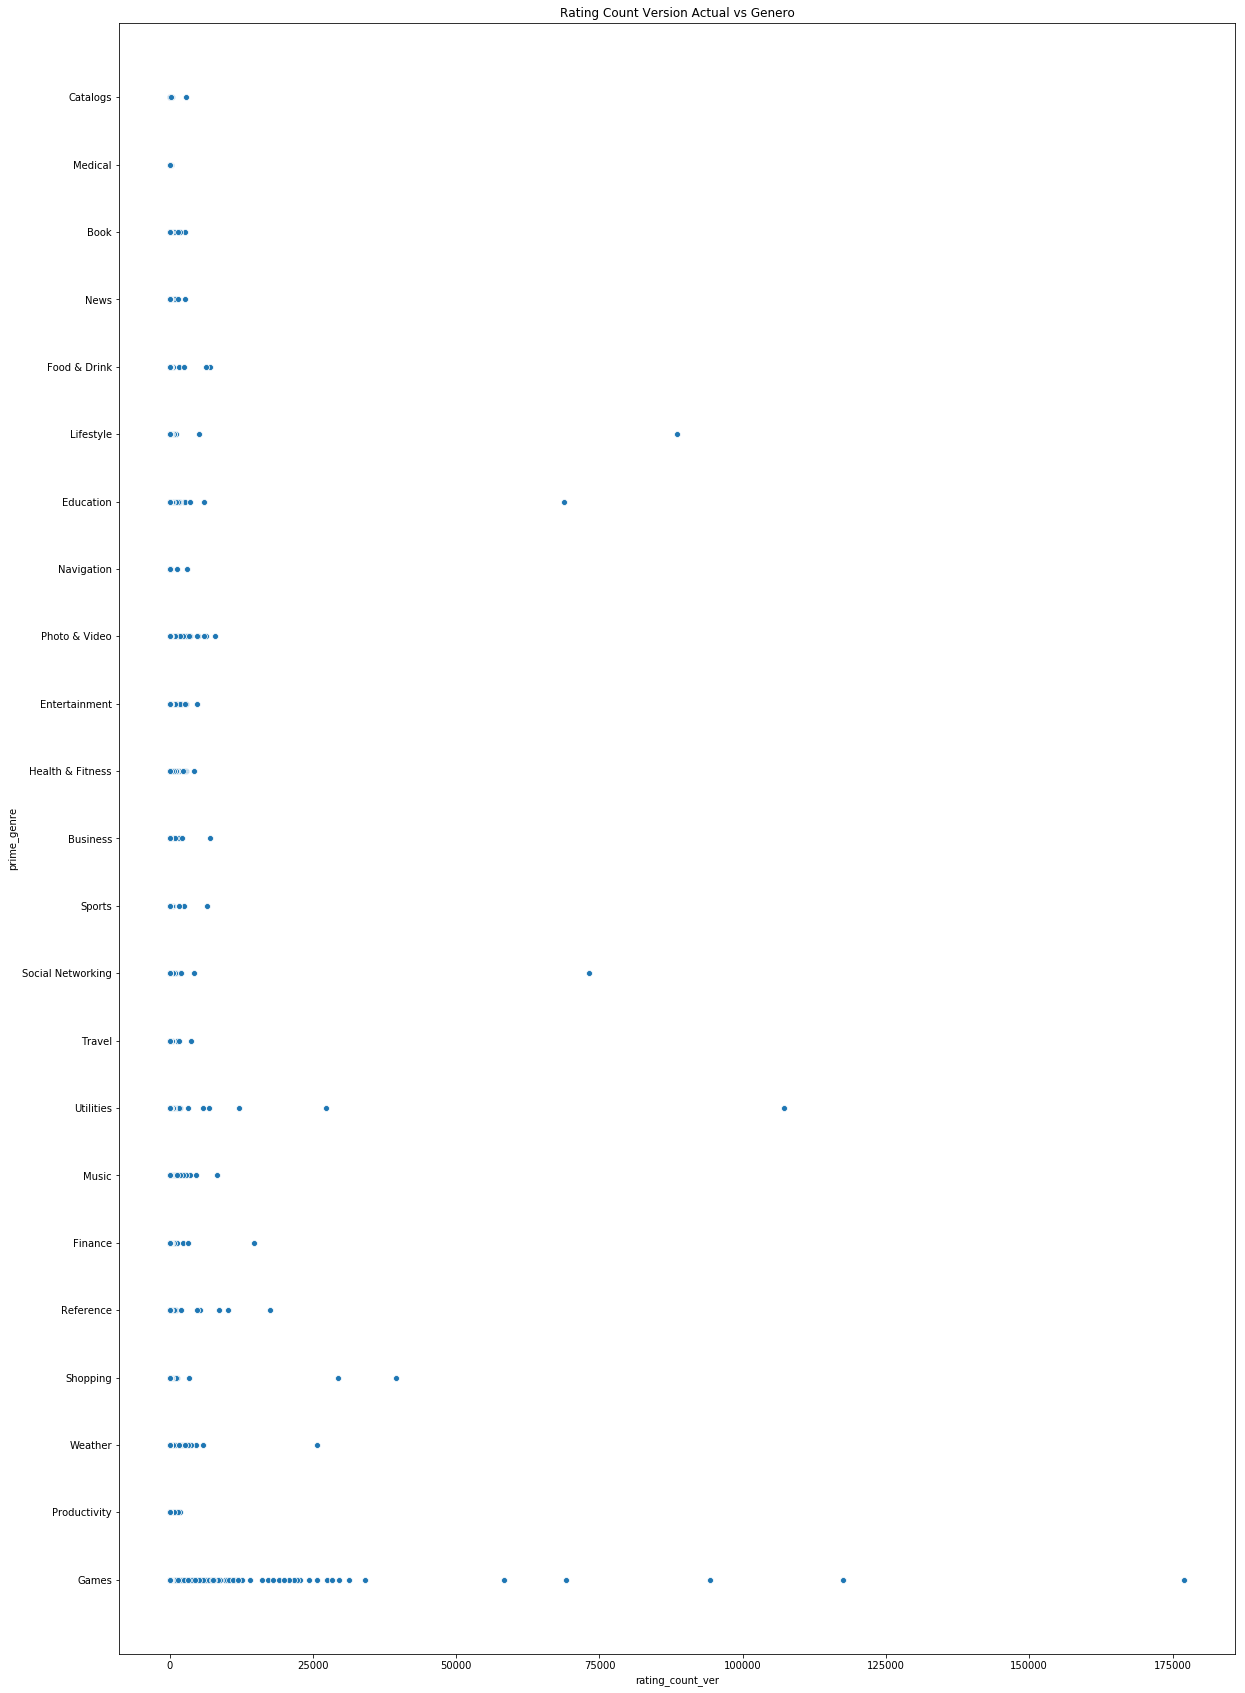

In [17]:
import seaborn as sns
plt.figure(figsize=(20,30))
plt.title("Rating Count Version Actual vs Genero")
sns.scatterplot(x=df5['rating_count_ver'], y=df5['prime_genre'])

### Calificación 4+ : no contiene material desagradable.
### Calificación 9+ : puede contener contenido inadecuado para niños menores de 9 años.
### Calificación 12+ : puede contener contenido inadecuado para niños menores de 12 años.
### Calificación 17+ : puede contener contenido inadecuado para niños menores de 17 años.

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64


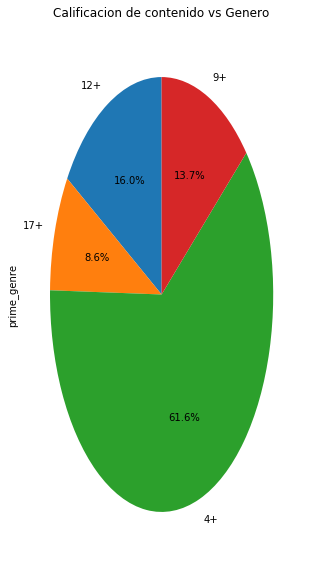

In [18]:
clasificacion = df5['cont_rating'].value_counts()
print(clasificacion)
plt.figure(figsize=(5,10))
plt.title("Calificacion de contenido vs Genero")
df5.groupby(['cont_rating'])['prime_genre'].count().plot(kind="pie",autopct='%1.1f%%', startangle=90)

### Cuantas aplicaciones recibieron una buena calificacion para la version actual de las aplicaciones

4.5    2205
0.0    1443
4.0    1237
5.0     964
3.5     533
3.0     304
2.5     176
2.0     136
1.0     125
1.5      74
Name: user_rating_ver, dtype: int64


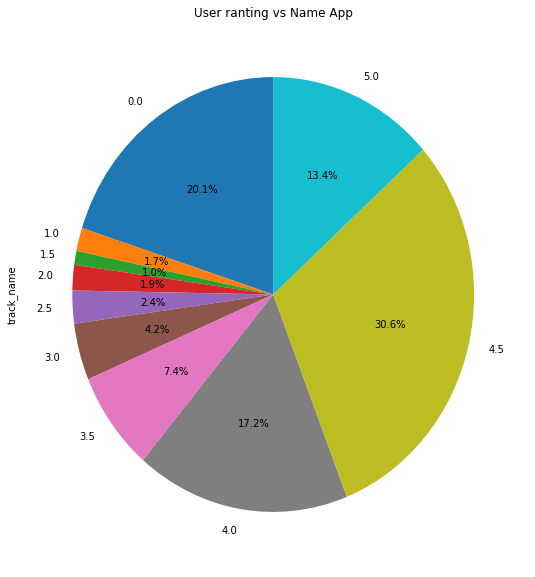

In [19]:
user_calif = df5['user_rating_ver'].value_counts()
print(user_calif)
plt.figure(figsize=(9,10))
plt.title("User ranting vs Name App")
df5.groupby(['user_rating_ver'])['track_name'].count().plot(kind="pie",autopct='%1.1f%%', startangle=90)

### Comparacion entre la calificacion total vs la calificacion de la version actual

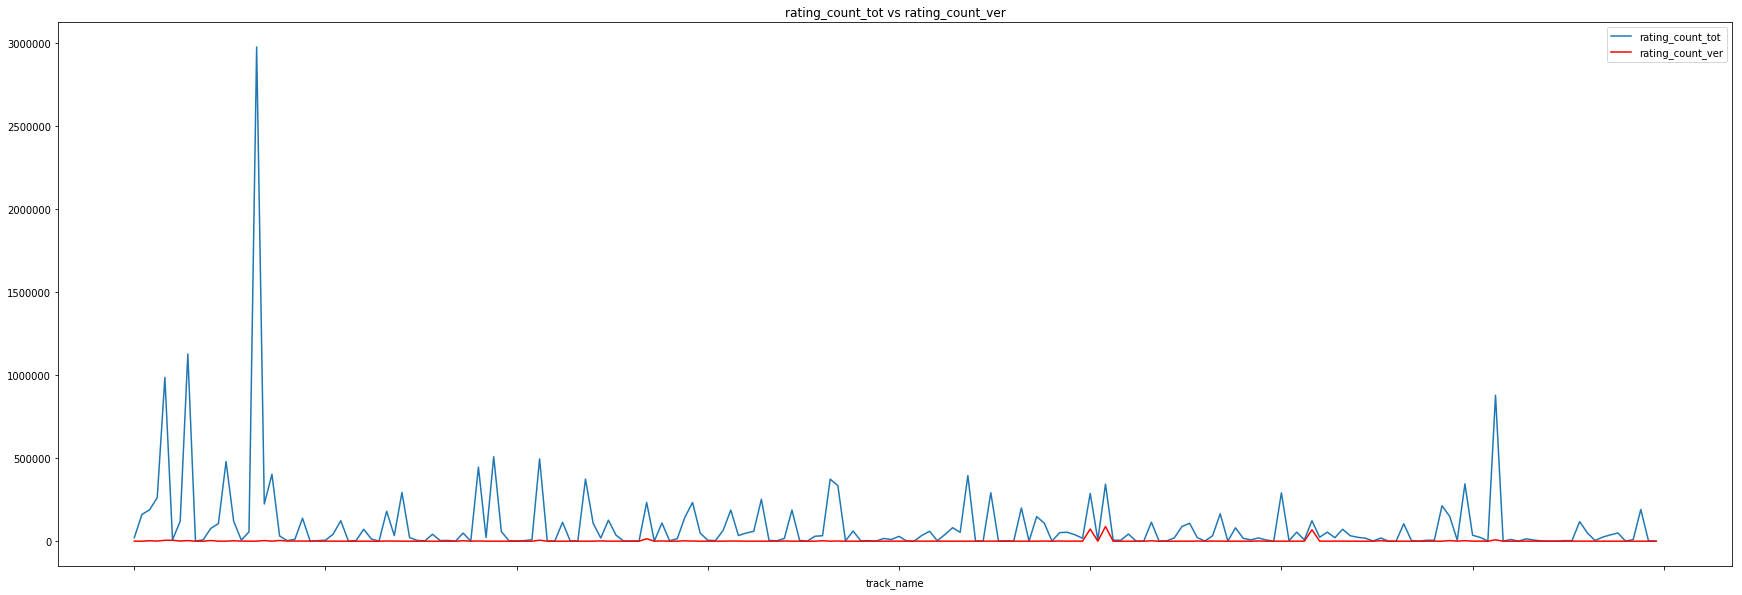

In [20]:
plt.figure(figsize=(30,10))
ax = plt.gca()
plt.title("rating_count_tot vs rating_count_ver")
df5.head(200).plot(kind='line',x='track_name',y='rating_count_tot',ax=ax)
df5.head(200).plot(kind='line',x='track_name',y='rating_count_ver', color='red', ax=ax)
plt.show()


### calificacion promedio del usuario (todas las versiones) vs la calificacion promedio de la version actual

### Cantidad de idiomas soportados en las aplicaciones

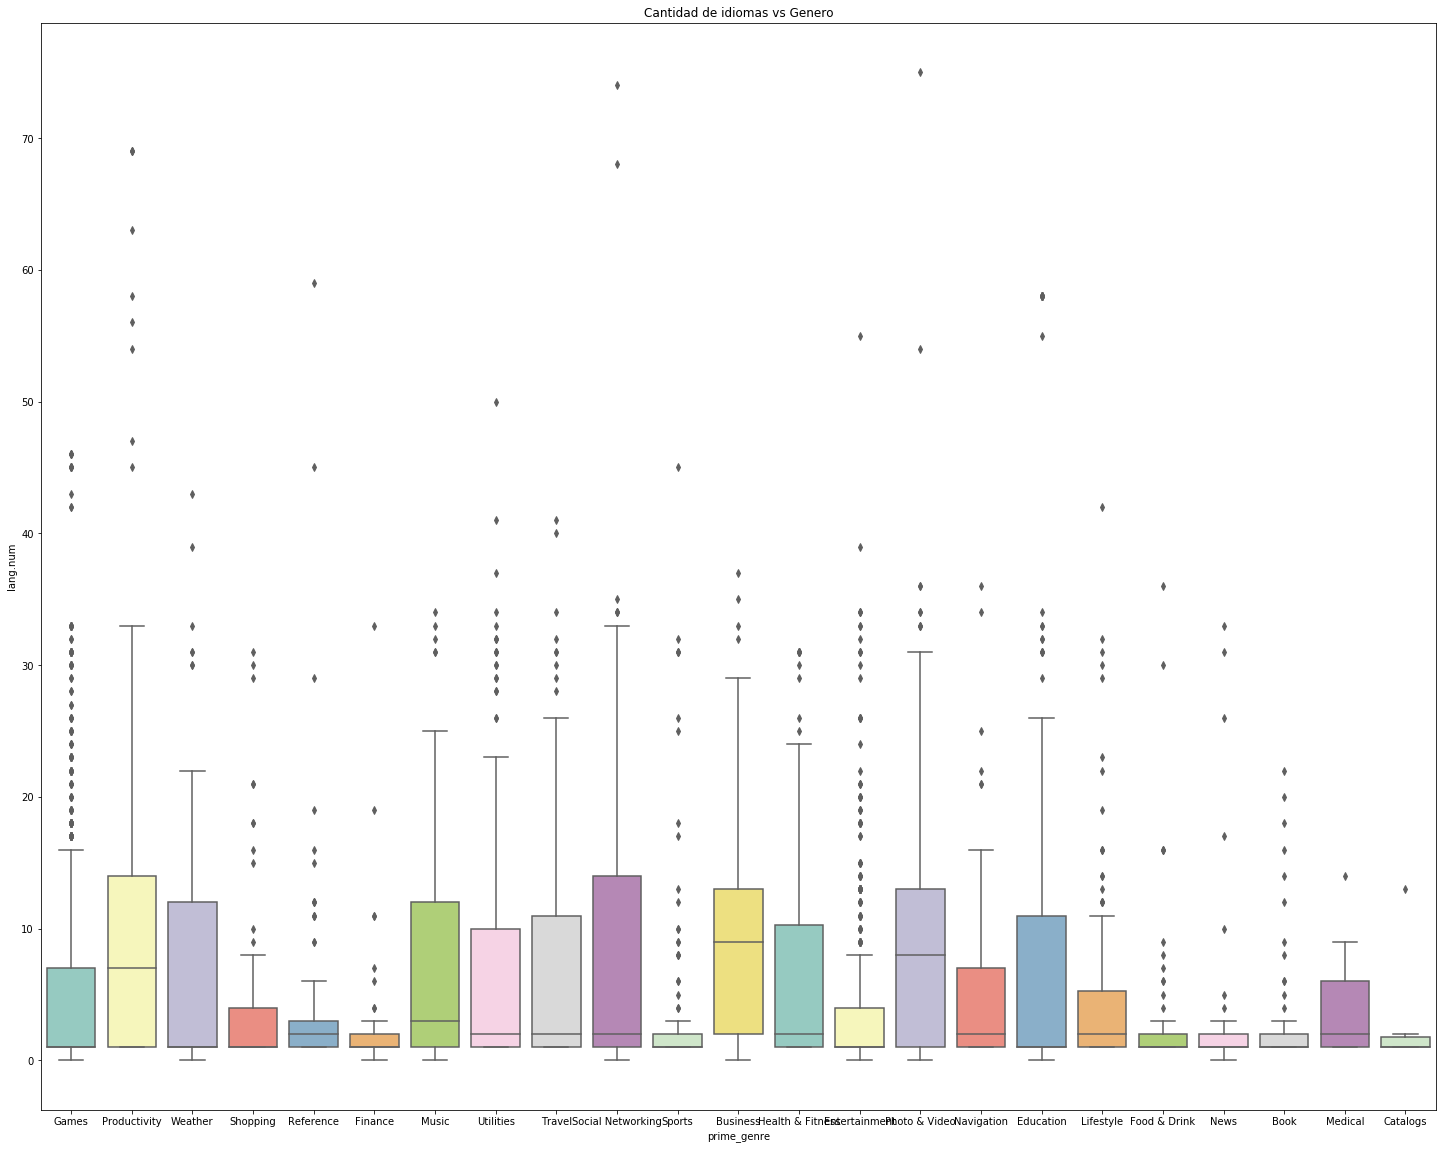

In [21]:
plt.figure(figsize=(25,20))
plt.title("Cantidad de idiomas vs Genero")
ax = sns.boxplot(x=df3["prime_genre"], y=df3["lang.num"], palette="Set3")

### Calificacion promedio del usuario a la version actual de las aplicaciones con respecto a los Generos

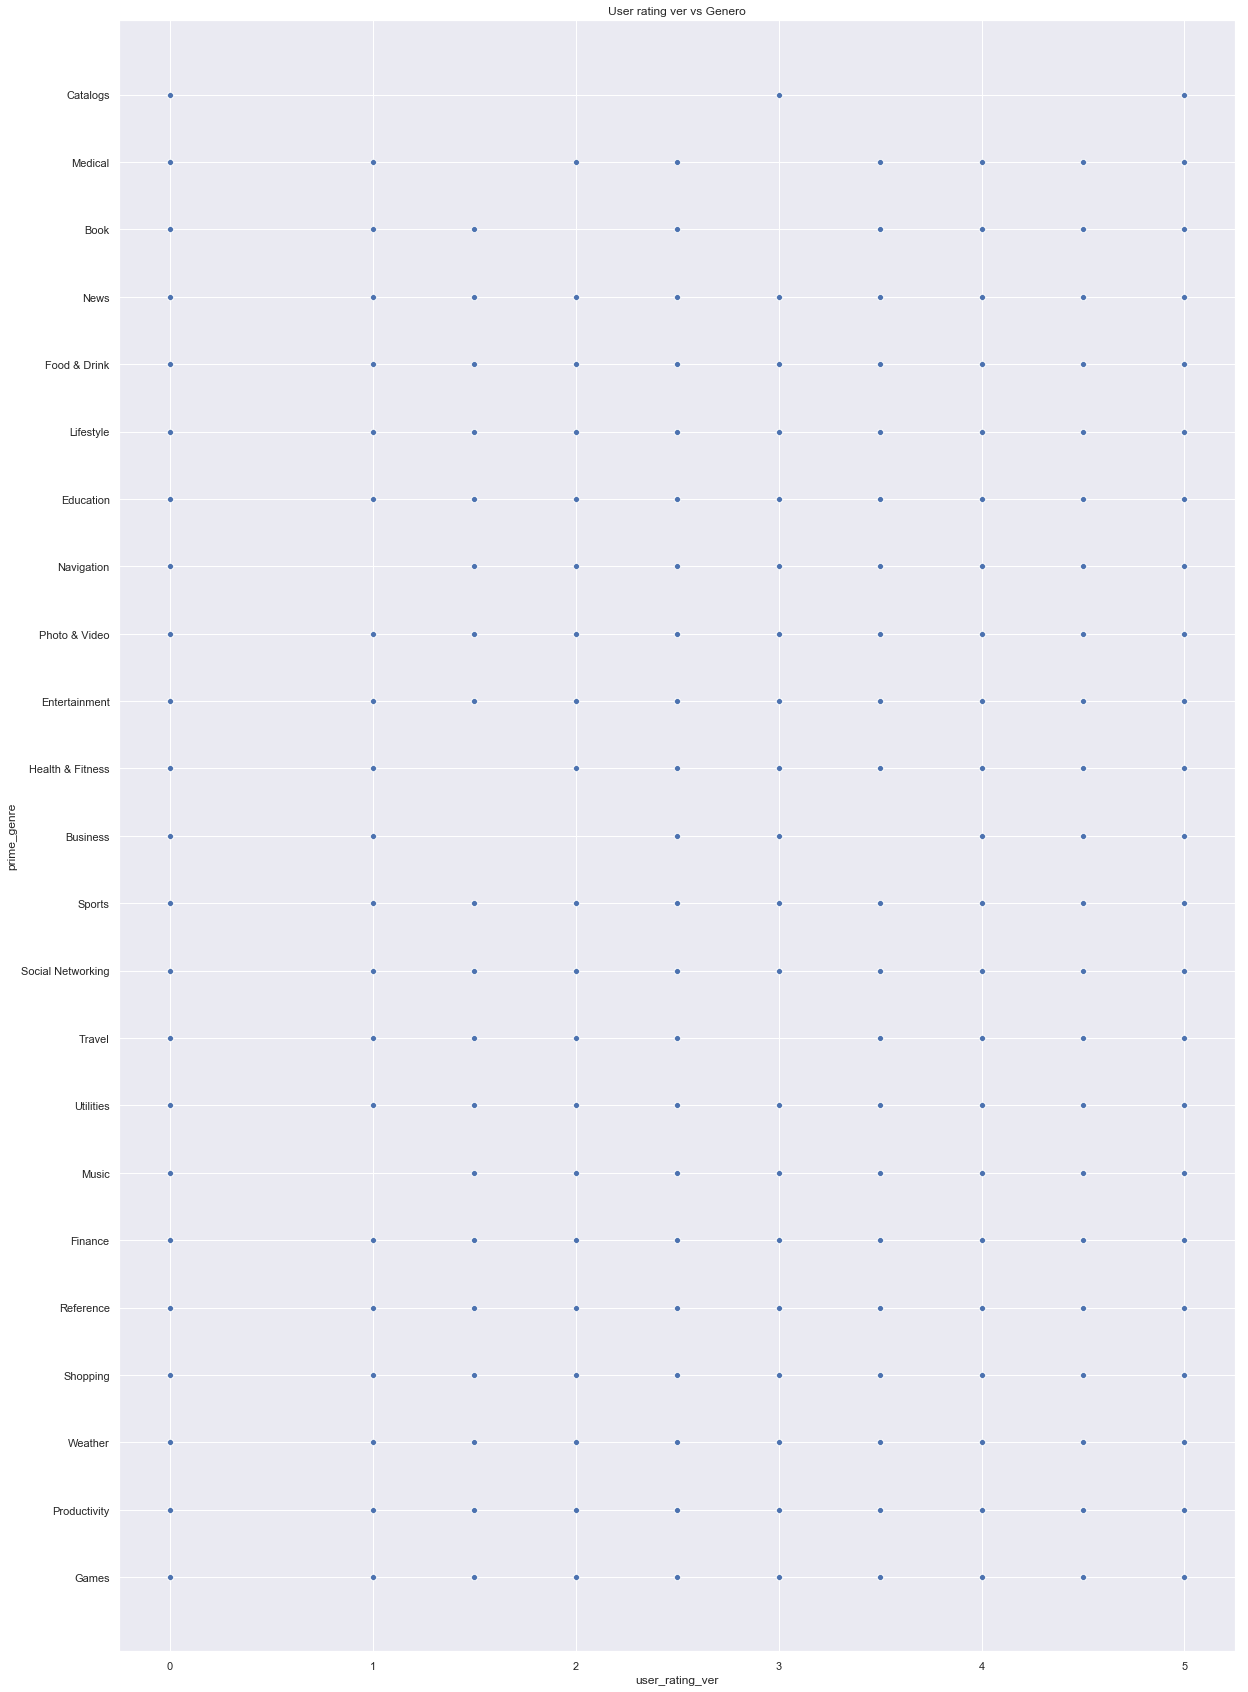

In [22]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
plt.title("User rating ver vs Genero")
ax = sns.scatterplot(x=df5["user_rating_ver"], y=df5['prime_genre'])

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Calificacion promedio de la version actual vs Genero")
df5['user_rating'].head(10).plot.area(x=df5['prime_genre'])